In [11]:
import pandas as pd
import numpy as np
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer

IMPORTING OUR DATA

In [12]:
pd.set_option('display.max_columns',None)
df = pd.read_csv('netflix_titles.csv')
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


DEALING WITH NULL VALUES

In [13]:
df.isnull().sum()


show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [14]:
df.drop('director', axis=1, inplace=True)
df.dropna(inplace=True)
df.reset_index()

,index,show_id,type,title,cast,country,date_added,release_year,rating,duration,listed_in,description
0,1,s2,TV Show,Blood & Water,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
1,4,s5,TV Show,Kota Factory,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
2,7,s8,Movie,Sankofa,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s..."
3,8,s9,TV Show,The Great British Baking Show,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",United Kingdom,"September 24, 2021",2021,TV-14,9 Seasons,"British TV Shows, Reality TV",A talented batch of amateur bakers face off in...
4,9,s10,Movie,The Starling,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,"September 24, 2021",2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...
...,...,...,...,...,...,...,...,...,...,...,...,...
7285,8801,s8802,Movie,Zinzana,"Ali Suliman, Saleh Bakri, Yasa, Ali Al-Jabri, ...","United Arab Emirates, Jordan","March 9, 2016",2015,TV-MA,96 min,"Dramas, International Movies, Thrillers",Recovering alcoholic Talal wakes up inside a s...
7286,8802,s8803,Movie,Zodiac,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
7287,8804,s8805,Movie,Zombieland,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
7288,8805,s8806,Movie,Zoom,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


In [15]:
df.shape

(7290, 11)

CLEANING UP AND FILTERING THE COLUMNS

In [16]:
df.drop(['rating','show_id','duration','date_added'], axis=1, inplace=True)

In [17]:
df.head()

,type,title,cast,country,release_year,listed_in,description
1,TV Show,Blood & Water,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
4,TV Show,Kota Factory,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
7,Movie,Sankofa,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...",1993,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s..."
8,TV Show,The Great British Baking Show,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",United Kingdom,2021,"British TV Shows, Reality TV",A talented batch of amateur bakers face off in...
9,Movie,The Starling,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,2021,"Comedies, Dramas",A woman adjusting to life after a loss contend...


In [18]:
df.cast = df.cast.apply(lambda x: ' '.join(x.split(',')))
df.country = df.country.apply(lambda x: ' '.join(x.split(',')))
df.listed_in = df.listed_in.apply(lambda x: ' '.join(x.split(',')).lower())
df.description = df.description.apply(lambda x: ' '.join(x.split(' ')).lower())

CREATING THE TAGS COLUMN

In [19]:
df['tags'] = df['type'] + ' ' + df['cast'] + ' ' + df['country'] + ' ' + df['listed_in'] + ' ' + df['description'] + ' ' + df.release_year.astype(str)

In [20]:
df.drop(['type', 'cast', 'country', 'listed_in', 'description','release_year'], axis=1, inplace=True)

In [25]:
df.reset_index(drop=True, inplace=True)
df.head()

,title,tags
0,Blood & Water,TV Show Ama Qamata Khosi Ngema Gail Mabalane...
1,Kota Factory,TV Show Mayur More Jitendra Kumar Ranjan Raj...
2,Sankofa,Movie Kofi Ghanaba Oyafunmike Ogunlano Alexa...
3,The Great British Baking Show,TV Show Mel Giedroyc Sue Perkins Mary Berry ...
4,The Starling,Movie Melissa McCarthy Chris O'Dowd Kevin Kl...


CREATING STEMS OF WORDS IN THE TAG COLUMN

The Porter Stemming algorithm (or Porter Stemmer) is used to remove the suffixes from an English word and obtain its stem which becomes very useful in the field of Information Retrieval (IR). This process reduces the number of terms kept by an IR system which will be advantageous both in terms of space and time complexity.

Example: We do not want the words 'love' and 'loved' to be different words in the vector hence we use stem words.

In [26]:
ps = PorterStemmer()

In [27]:
def stem(text):
    y = []
    for i in text.split():
        y.append(ps.stem(i))
    return ' '.join(y)

In [28]:
df.tags = df.tags.apply(stem)

CREATING STRING COUNT VECTORS

It is used to transform a given text into a vector on the basis of the frequency (count) of each word that occurs in the entire text. This is helpful when we have multiple such texts, and we wish to convert each word in each text into vectors (for using in further text analysis)

In [29]:
vectorizer = CountVectorizer()
vectorizer.fit(df.tags)
vector = vectorizer.transform(df.tags)

IMPLEMENTING THE COSINE SIMILARITY FUNCTION

Cosine similarity measures the similarity between two vectors of an inner product space. It is measured by the cosine of the angle between two vectors and determines whether two vectors are pointing in roughly the same direction. It is often used to measure document similarity in text analysis.

A document can be represented by thousands of attributes, each recording the frequency of a particular word (such as a keyword) or phrase in the document.

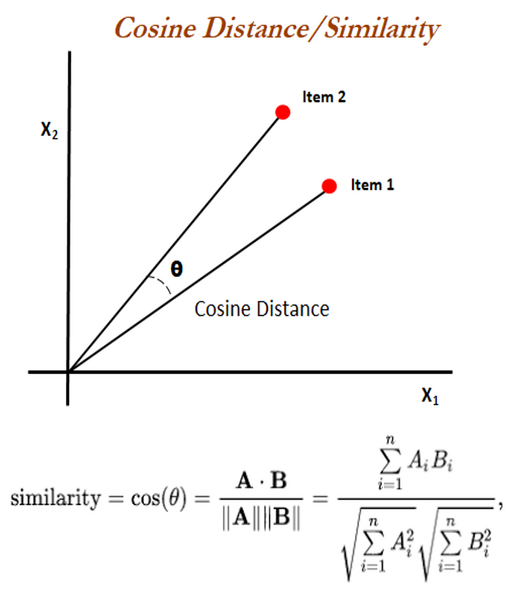

In [30]:
#np.dot for dot product of the two vectors and np.linalg.norm for the modulus of the vectors.
def cosine_sim(a, b):
    return np.dot(a, b)/(np.linalg.norm(a)*np.linalg.norm(b))

In [31]:
# Function to create a similarity matrix with the cosine similarity scores of each movie with every other movie.
def similarities(index):
    similar = []
    for i in range(0, vector.shape[0]):
        similar.append(cosine_sim(vector[index].toarray()[0], vector[i].toarray()[0]))
    return similar

In [39]:
# Function to recommend the top 10 Movies or TV Shows based on the cosine similarity score of the movies.
def recommend(title):
    index = df[df.title == title].index[0]
    similar = similarities(index)
    similar = list(enumerate(similar))
    similar = sorted(similar, key=lambda x: x[1], reverse=True)
    similar = similar[1:11]
    for i in similar:
        print(df.iloc[i[0]].title)
    

EXAMPLES

In [40]:
recommend('Breaking Bad')

Better Call Saul
Argon
Get Even
Jack Taylor
MINDHUNTER
Van Helsing
Warrior
Sin senos no hay paraíso
Unit 42
You


In [41]:
recommend('The Matrix')

The Matrix Reloaded
The Matrix Revolutions
The Time Machine
The Lord of the Rings: The Return of the King
Wildling
The Ice Road
Singularity
Superman Returns
The Brothers Grimm
The Boy


In [42]:
recommend('The Conjuring')

Laddaland
Secrets of Henry VIII's Palace: Hampton Court
In Darkness
Secrets of Chatsworth
Night Moves
Tales From the Hood 2
Secrets of Highclere Castle
The Dark Crystal
In the Tall Grass
1BR
